# Cats and Dogs old

In [1]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS) / "images"

In [4]:
def is_cat(x): return x[0].isupper()

In [5]:
dls = ImageDataLoaders.from_name_func(path,
                                     get_image_files(path),
                                     valid_pct=0.2,
                                     label_func=is_cat,
                                      item_tfms=Resize(224))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

C:\Users\hdotd\Desktop\work envs\pytorch\pytorch env\lib\site-packages\fastai\vision\learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\hdotd\Desktop\work envs\pytorch\pytorch env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\hdotd\Desktop\work envs\pytorch\pytorch env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/mo

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [7]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.136037,0.030763,0.009472,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.031530,0.024894,0.008119,01:13
1,0.027051,0.016241,0.005413,01:12


In [12]:
from fastbook import *

In [15]:
urls = search_images_ddg("bull photos", max_images=1)

In [16]:
len(urls)

1

In [21]:
urls

(#1) ['https://media.istockphoto.com/photos/bull-picture-id868331022?k=6&m=868331022&s=612x612&w=0&h=jajdkE_nDnii6b956eIM8I5WNGESOMaN4Z70-v752A0=']

In [26]:
dest = Path("bull.jpg")

In [27]:
if not dest.exists():
    download_url(urls[0],
                dest,
                show_progress=True)

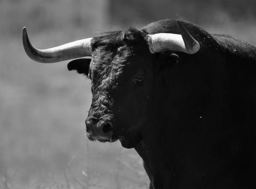

In [28]:
img = Image.open(dest)
img.to_thumb(256, 256)

In [40]:
categories = ("animals", "river", "planet", "girls")

In [41]:
path = Path("girl_or_not")

In [48]:
if path.exists():
    for i in categories:
        dest = (path/i)
        res = search_images_ddg(i + " images")
        print(len(res))
        download_images(dest, urls=res, max_pics=50)

200
200
200
200


In [50]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=0.2),
               get_y=parallelableent_label,
               item_tfms=[Resize(192, method="squish")]).dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


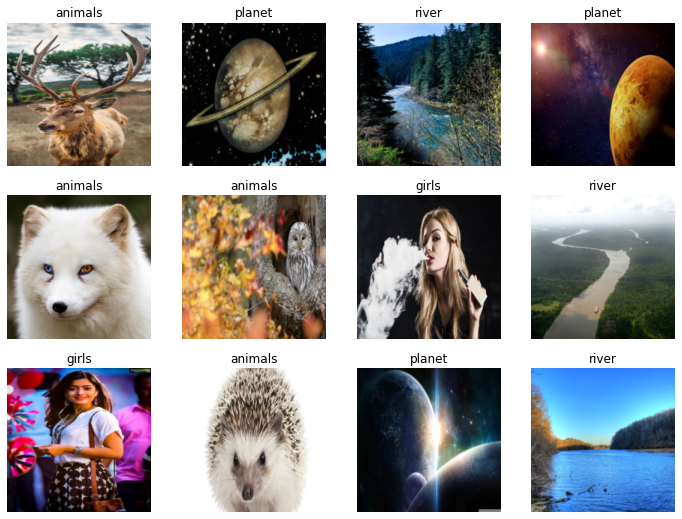

In [51]:
dls.show_batch(max_n=12)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)